In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [24]:
#Read the input files and read every line
def loadData(trainingFile, testingFile):
    trainFile=loadFile(trainingFile)
    testFile=loadFile(testingFile)
    #Split each line in the two files into label and data  
    train_data_list = []
    train_labels_list = []

    for inputData in trainFile:
        train_labels_list.append(inputData[0])

            #Remove the activity label (0/1) and new line character from each record
        inputData = inputData.replace("0\t", "")
        inputData = inputData.replace("1\t", "")
        inputData = inputData.replace("\n", "")
        train_data_list.append(inputData)

    train_labels = np.asarray(train_labels_list)
    train_data = convert2Dataframe(train_data_list)
    #train_data.head()
    test_data = convert2Dataframe(testFile)
    #test_data.head()

    return train_data, test_data, train_labels




In [23]:
def loadFile(file_name):
    with open(file_name, "r") as fr:
        inputFile = fr.readlines()
    return inputFile

def convert2Dataframe(inputFile):
    
    data = pd.DataFrame(columns=range(100000))
    for i in range(len(inputFile)):
        record = np.fromstring(inputFile[i], dtype=int, sep=' ')
        record_bool = [0 for j in range(100000)]
        for col in record:
               record_bool[col-1] = 1
        data.loc[i] = record_bool
            
    return data

#convert2Dataframe('test.dat')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X, y)

In [33]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Project data on a reduced dimensionality k using PCA
def pca(train_data, test_data, k):

    pca = sklearnPCA(n_components = k)
    PCA_projected_trainData = pca.fit_transform(train_data)
    PCA_projected_testData = pca.transform(test_data)
    
    return PCA_projected_trainData, PCA_projected_testData

def lda(train_data,train_labels, test_data,test_labels, k):
    # 创建线性判别分析对象，并指定降维后的维度为2
    lda = LinearDiscriminantAnalysis(n_components = k)

    # 对数据进行降维，并查看方差比例
    LDA_projected_trainData = lda.fit_transform(train_data,train_labels)
    LDA_projected_testData = lda.fit_transform(test_data,test_labels)
    print(lda.transform(test_data))
    print(lda.explained_variance_ratio_)
    return LDA_projected_trainData, LDA_projected_testData



In [6]:
import numpy as np
from scipy.sparse import csr_matrix
# 创建一个稀疏矩阵
sparse_matrix = csr_matrix(np.array([[0, 0, 3], [4, 0, 0], [0, 2, 0]]))
print(sparse_matrix)
# 还原为一个二维数组
dense_array = sparse_matrix.toarray()
print(dense_array)
# 还原为一个矩阵对象
dense_matrix = sparse_matrix.todense()
print(dense_matrix)

  (0, 2)	3
  (1, 0)	4
  (2, 1)	2
[[0 0 3]
 [4 0 0]
 [0 2 0]]
[[0 0 3]
 [4 0 0]
 [0 2 0]]


In [26]:
#Read the training and the test data set and get 3 separate dataframes of training reviews, test reviews and training labels
train_data, test_data, train_labels = loadData('train.dat', 'test.dat')

In [35]:
#Reduce the number of dimensions from 100000 to 500 using PCA or LDA
train_labels = train_labels.astype(int)
test_labels = np.array(loadFile('valid_labels.dat')).astype(int)
PCA_projected_trainData, PCA_projected_testData = pca(train_data, test_data, 500)
LDA_projected_trainData, LDA_projected_testData = lda(train_data,train_labels, test_data,test_labels, 1)
print(PCA_projected_trainData, PCA_projected_testData)
print(LDA_projected_trainData, LDA_projected_testData)

[[-2.83720006e-01]
 [-7.79233496e-02]
 [ 4.37525270e+00]
 [ 2.48624764e-01]
 [ 3.35187538e-01]
 [-3.43690426e-01]
 [ 1.35763886e-01]
 [ 1.04714159e+00]
 [ 2.45791754e-02]
 [-1.84291815e-01]
 [-3.45969482e-03]
 [-4.78074778e-01]
 [-6.07514659e-01]
 [-5.58965012e-01]
 [ 1.92504856e-01]
 [ 3.46919363e-03]
 [-1.12866322e-01]
 [-1.31643132e-01]
 [-3.59624108e-01]
 [ 2.68385645e-01]
 [ 4.78385942e-02]
 [-3.47748584e-01]
 [ 1.29983734e-02]
 [-1.89246976e-01]
 [-1.25338267e+00]
 [ 2.15671051e-01]
 [ 9.15079974e-02]
 [-3.55140373e-01]
 [-2.92907172e-03]
 [-5.88960349e-01]
 [-1.68684886e-01]
 [ 3.37179548e-02]
 [-2.23999074e-01]
 [-5.80483960e-01]
 [-9.72449279e-02]
 [ 5.67478970e-02]
 [-5.84745549e-01]
 [-9.07162982e-01]
 [-3.03625825e-01]
 [-4.35167347e-01]
 [ 1.09841572e-01]
 [ 1.27024206e-01]
 [ 4.94908789e-03]
 [-4.76517172e-02]
 [-3.17958438e-01]
 [-6.63308189e-02]
 [-7.35838660e-01]
 [-1.42060815e+00]
 [-1.19135777e-02]
 [-1.62179154e-02]
 [ 7.32510195e-01]
 [ 5.72738921e+00]
 [ 8.0228506

15 335


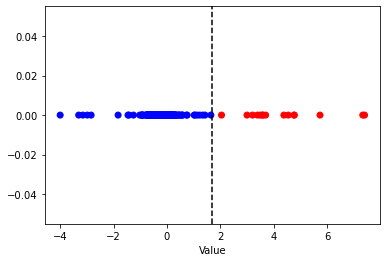

In [47]:
import matplotlib.pyplot as plt



# 创建一个随机的 n*1 数组
#n = 10
#arr = np.random.randn(n, 1)
# 统计正数和负数的个数
#print(arr)
# 设置阈值
threshold = np.max(LDA_projected_testData)-0.5*(np.max(LDA_projected_testData)-np.min(LDA_projected_testData))
pos_count = np.count_nonzero(LDA_projected_testData > threshold)
neg_count = np.count_nonzero(LDA_projected_testData < threshold)
print(pos_count, neg_count)

# 根据阈值设置颜色
colors = np.ravel(np.where(LDA_projected_testData > threshold, 'red', 'blue'))

# 绘制散点图
plt.scatter(LDA_projected_testData, np.zeros(np.size(LDA_projected_testData,0)), c=colors)
plt.axvline(threshold, color='k', linestyle='--') # 绘制阈值线
plt.xlabel('Value')
plt.show()
# 5 5


In [50]:
# 导入sklearn.metrics模块
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# 定义真实标签和预测标签
y_pred = []
for i in range(np.size(LDA_projected_testData,0)):
    if LDA_projected_testData[i,0]>threshold:
        y_pred.append(1)
    else:y_pred.append(0)
# 计算准确率
acc = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.4f}".format(acc))

# 计算精确率
precision = precision_score(test_labels, y_pred)
print("Precision: {:.4f}".format(precision))

# 计算召回率
recall = recall_score(test_labels, y_pred)
print("Recall: {:.4f}".format(recall))

# 计算F1分数
f1 = f1_score(test_labels, y_pred)
print("F1-score: {:.4f}".format(f1))

# 计算ROC曲线和AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC curve: fpr = {}, tpr = {}, AUC = {:.4f}".format(fpr, tpr, roc_auc))

Accuracy: 0.9457
Precision: 1.0000
Recall: 0.4412
F1-score: 0.6122
ROC curve: fpr = [0. 0. 1.], tpr = [0.         0.44117647 1.        ], AUC = 0.7206


In [ ]:
from sklearn.naive_bayes import BernoulliNB
#Perform Bernoulli's Naive Bayes Classification
def BNBC(PCA_projected_trainData, PCA_projected_testData, train_labels ):

    clf = BernoulliNB()
    clf.fit(PCA_projected_trainData, train_labels)

    predictions = []

    predictions = clf.predict(PCA_projected_testData)

    return predictions

In [10]:
#Classify data using Naive Bayes Classifier
predictions = BNBC(PCA_projected_trainData, PCA_projected_testData, train_labels )

['0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0

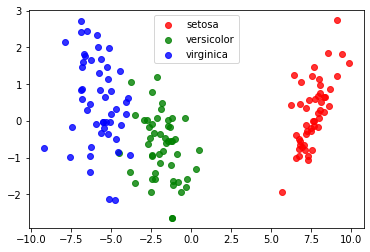

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
iris = datasets.load_iris()

#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [49]:
LDA_projected_testData[25,0]

0.21567105079195806